# CSCI E 7 Homework 10

## 2021

## Fill in your name

In [1]:
first_name = "Erin"
last_name = "Lopez"

assert(len(first_name) != 0)
assert(len(last_name)  != 0)
print(first_name, last_name)

Erin Lopez


# Problem 1: Subslice

List A is a subslice of list B if you can find x and y such that
```python
A = B[x:y]
```
Write a function that decides if A is a subslice of B

In [2]:
def is_subslice(a, b):
    """Is A a slice from B?"""
    if a == []:
        return True
    else:
        l = [i for i, x in enumerate(b) if x == a[0]] #create list of indices in b that match a[0]
        for x in l: #for each instance in b that matches a[0]
            lst = []
            try:
                for i in a:
                    lst.append(i == b[x]) #list of whether each item in a matches slice of b
                    x+=1
            except IndexError: #catches error if len(a) > whats left in b
                return False
            
            if all(lst) == True: #check if any lst is all true -> A is a subslice of B
                    return True

        

### Unit Tests

In [3]:
def test_subslice():
    assert(is_subslice([], []))
    assert(is_subslice([], [1, 2, 3, 4, 5]))
    assert(is_subslice([1, 2, 3], [1, 2, 3, 4, 5]))
    assert(is_subslice([3, 4, 5], [1, 2, 3, 4, 5]))
    assert(is_subslice([3, 4, 5], [1, 2, 3, 4, 5]))
    assert(is_subslice([3, 4, 5], [1, 2, 3, 4, 5]))
    assert(is_subslice([5, 3, 4], [5, 1, 2, 5, 3, 4, 5, 3, 2, 1]))
    assert(is_subslice([], [1, 2, 3, 4, 5]))
    assert(is_subslice([3, 4], [1, 2, 3, 4, 5]))
    assert(is_subslice([1, 2, 3], [1, 2, 3]))
    assert(is_subslice([1, 2, 3], [1, 2, 1, 2, 3, 4, 5])) # If at first you don't succeed
    assert(not is_subslice([1, 2], [12]))
    assert(not is_subslice([1, 2], [2, 1]))
    assert(not is_subslice([1, 2, 3, 4, 5], [2, 3, 4]))
    assert(not is_subslice([1, 3, 5], [1, 2, 3, 4, 5])) # This is a subset, but isn't a subslice
    
    print('Success!')
    
test_subslice()

Success!


# Problem 2: Word Lengths
We are interested in the distribution of word lengths in English words.  We will use our file words.txt.  

Write a function wordLengths() that takes a path to a list of words and returns a list with tuples holding the number of words of each word length.

Sort your list by length of word.

Here are my partial results: words.txt holds 85 words of length 2, 908 words of length 3, and 3 words of length 21.
```python
    [(2, 85), (3, 908), ... (21, 3)]
```

In [4]:
def wordLengths(filepath):
    """Return sorted list of the number of words of each length"""
    words = open(filepath, 'r')
    
    
    lengths = []
    counts = []
    lst = []
    for w in words: #length of each word
        w = w.strip()
        lengths.append(len(w))
        
    for l in lengths: #count of each length
        counts.append(lengths.count(l))
    
    lst = list(zip(lengths, counts)) #match lengths & counts

    wordlengths = []
    for n in lst:
        if n not in wordlengths:
            wordlengths.append(n)
    wordlengths.sort()
    return wordlengths


### Unit Tests

In [5]:
## Change this to point to your copy of words.txt
filepath = 'words.txt'

def test_wordLengths(filepath):
    lst = wordLengths(filepath)
    print(lst)
    
    print(lst[0])
    assert lst[0] == (2, 85)
    assert lst[1] == (3, 908)
    assert lst[5] == (7, 21727)
    assert lst[-1] == (21, 3)
    
    print('\nSuccess!')

test_wordLengths(filepath)

[(2, 85), (3, 908), (4, 3686), (5, 8258), (6, 14374), (7, 21727), (8, 26447), (9, 16658), (10, 9199), (11, 5296), (12, 3166), (13, 1960), (14, 1023), (15, 557), (16, 261), (17, 132), (18, 48), (19, 16), (20, 5), (21, 3)]
(2, 85)

Success!


# Problem 3: Draw a bar chart of the word lengths

Use matplotlib to draw a bar chart of the word lengths.  You may want to peek at the documentation

https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py

or at this tutorial

https://datatofish.com/bar-chart-python-matplotlib/

You may want to start with the vidoes I posted in Modules/Video Links/Libraries

Your bar chart should lineup with your results from problem 1.

In [6]:
def plot_bar_chart(filepath):
    """Plot a histogram of word lengths"""
    import matplotlib.pyplot as plt
    lst = wordLengths(filepath)
    #lst = [(2, 85), (3, 908), (4, 3686), (5, 8258), (6, 14374), (7, 21727), (8, 26447), (9, 16658), (10, 9199), (11, 5296), (12, 3166), (13, 1960), (14, 1023), (15, 557), (16, 261), (17, 132), (18, 48), (19, 16), (20, 5), (21, 3)]
    xaxis = []
    yaxis = []
    
    for (x, y) in lst: #separate list into x and y data points
        xaxis.append(x)
        yaxis.append(y)
        
    plt.bar(xaxis, yaxis)
    
    plt.title('Word Length Frequencies', fontsize=14)
    plt.xlabel('Word Length', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    
    plt.show()

### Unit Test

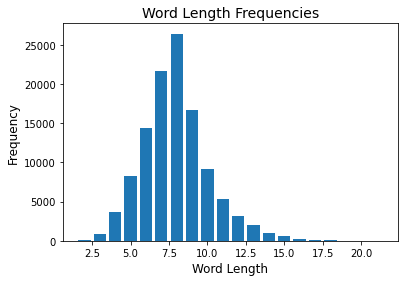

In [7]:
## Use the variable filepath defined above

plot_bar_chart(filepath)

# Problem 4: Count Pairs

Write a program to count the frequency of each pair of letters in a Fasta file holding a DNA sequence.

Fasta files have a one line header describing the source, and a sequence of lines with information.  
They are used to hold DNA or Amino Acid sequences.  

For example, the file pACYC184.fasta holds a DNA sequence of length 4245, which starts as

```python
GAATTCCGG...
```

That holds the pairs GA, AA, AT, TT, TC, CC, CG, GG, ...

You could store your data in a 2D array, a list of 4 lists of length 4, 
or you could store your data in a Dictionary mapping strings of length 2 to integers.    

Count the frequency of each pair, and print a chart.  For pACYC184.fasta, the chart should look like this:

```python
        A       G       C       T 
A     251     212     231     262 
G     229     287     361     216 
C     288     312     291     276 
T     188     282     284     274 
```
The function print_pair_count() has 'print' in the title, so you may print from the function.

I suggest having functions to read the data, count the pairs, and print the chart.  

In [8]:
def print_pair_count(filename):
    """Print a chart showing frequency of base pairs in Fasta file"""
    import numpy as np
    
    #read data
    file = open(filename, 'r')
    title = file.readline()
    seq = file.read().replace('\n', '')
    file.close()
    
    #find pairs
    pairs = []
    for n in range(len(seq)-1):
        pair = seq[n] + seq[n+1]
        pairs.append(pair)
    
    #count pairs
    arow = ['A', pairs.count('AA'), pairs.count('AG'), pairs.count('AC'), pairs.count('AT')]
    grow = ['G', pairs.count('GA'), pairs.count('GG'), pairs.count('GC'), pairs.count('GT')]
    crow = ['C', pairs.count('CA'), pairs.count('CG'), pairs.count('CC'), pairs.count('CT')]
    trow = ['T', pairs.count('TA'), pairs.count('TG'), pairs.count('TC'), pairs.count('TT')]
    header = [' ', 'A', 'G', 'C', 'T']
    chart = np.array([header, arow, grow, crow, trow])
    
    #print formatting
    #find element with most digits and line chart up with spaces
    diglst = []
    for row in chart:
        for a in row:
            diglst.append(len(str(a)))
    
    digits = max(diglst)
    space = ' '*digits
    
    for row in chart:
        for a in row:
            if a == row[0]:
                print(a+'  ', end=' ')
            else:
                print(space[len(str(a)):]+a, end=' ')
        print()
        
    print(f'Sequence length: {len(seq)} nucleotides')


### Unit Tests

You will need to have copies of the three datasets in your directory.  

Be sure to check the lengths of your strings: you don't want the newlines from the file included in your strings.

## Run your program on the datasets below

In [9]:
print_pair_count('pKLMF-FX.fasta')  # string of length 9988

      A   G   C   T 
A   859 623 560 629 
G   626 582 627 557 
C   639 550 565 599 
T   546 638 601 786 
Sequence length: 9988 nucleotides


In [10]:
print_pair_count('ecoli.fasta')     # string of length 4641652

         A      G      C      T 
A   338006 238013 256773 309950 
G   267384 270252 384102 255699 
C   325327 346793 271821 236149 
T   212024 322379 267395 339584 
Sequence length: 4641652 nucleotides


In [11]:
print_pair_count('Human22.fasta')   # string of length 31264301

          A       G       C       T 
A   2364973 2360439 1594610 1797885 
G   1906206 2238900 1784420 1590558 
C   2414606  513594 2237613 2358130 
T   1432121 2407152 1907300 2355793 
Sequence length: 31264301 nucleotides


Does anything seem odd in the last table?

# Problem 5: The Extension School
Use Beautiful Soup to examine the base landing page https://www.extension.harvard.edu

How many links are there?

Links may be relatve or absolute:
    /academics/programs/academic-gap-year/ is a relative link: you get an absolute link by adding the base
            
    https://www.extension.harvard.edu/academics/programs/academic-gap-year/
    
How many links are relative?  How many are relative, and how many are absolute?

(Why would a relative path be useful?)

How many links appear twice?

Which links appear three times?  

## Find all the links

In [12]:
## 
from bs4 import BeautifulSoup
import requests

#get webpage
url = ('https://extension.harvard.edu/')
webpage = requests.get(url)
webtext = webpage.text
soup = BeautifulSoup(webtext, "html.parser")

#find & print all links, put into list for later
linklst = []
for link in soup.find_all('a'):
    links = link.get('href')
    linklst.append(links)
    print(links)
    


#content
/about/news-press/covid-19-updates/
https://extension.harvard.edu
https://extension.harvard.edu/academics/
/academics/programs/take-a-course/
https://extension.harvard.edu/academics/academics-graduate-degrees/
https://extension.harvard.edu/academics/graduate-certificates/
https://extension.harvard.edu/academics/undergraduate-degree-and-certificates/
https://extension.harvard.edu/academics/programs/premedical-program/
/academics/programs/academic-gap-year/
https://extension.harvard.edu/registration-admissions/
https://extension.harvard.edu/registration-admissions/course-registration/
https://extension.harvard.edu/registration-admissions/degree-program-admissions/
https://extension.harvard.edu/registration-admissions/pursuing-a-certificate/
https://extension.harvard.edu/for-students/
/academics/programs/premedical-program/applying-to-premedical-program/
/registration-admissions/academic-calendar/
https://extension.harvard.edu/paying-for-school/
https://extension.harvard.edu/payi

## How many links are there?

In [13]:
## 
print(f'There are {len(linklst)} links at {url}.')


There are 114 links at https://extension.harvard.edu/.


## How many are relative links?

In [22]:
## 
relative = 0
for link in linklst:
    if 'http' not in str(link):
        relative+=1
absolute = len(linklst) - relative
print(f'There are {relative} relative links and {absolute} absolute links.')

There are 24 relative links and 90 absolute links.


## How many links appear exactly twice?

In [15]:
## find number or times each link appears
dup = 0
for link in linklst:
    reps = linklst.count(link)
    if reps == 2:
        dup+=1
print(f'Number of links that appear twice: {dup//2}')

Number of links that appear twice: 29


## Which links appear three or more times?

In [21]:
## List the links that appear more than twice
threeplus = []
for link in linklst:
    reps = linklst.count(link)
    if reps >= 3:
        if link not in threeplus: #only print each link once
            print(f'{link} appears {reps} times.')
            threeplus.append(link)
        

https://extension.harvard.edu appears 3 times.
/academics/programs/take-a-course/ appears 3 times.
https://extension.harvard.edu/for-students/ appears 3 times.
https://extension.harvard.edu/about/ appears 3 times.
https://extension.harvard.edu/about/student-stories/ appears 3 times.
https://courses.dce.harvard.edu/extension appears 3 times.


# Post Mortem
## How long did it take you to solve this problem set?
## Did anything confuse you or cause difficulty?

In [18]:
## Your thoughts
#It took two days and a difficulty was not knowing some of the correct answers for the last problem to check my work